In [1]:
""" Created on March 3, 2023 // @author: Sarah Shi """

import numpy as np
import pandas as pd
import scipy
from scipy.stats import multivariate_normal

import os
import time
import random
import warnings

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA, KernelPCA
from sklearn.manifold import Isomap, LocallyLinearEmbedding, TSNE
from sklearn.preprocessing import scale, normalize, StandardScaler
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

import matplotlib
from matplotlib import pyplot as plt
from matplotlib import rc
import matplotlib.colors as mcolors
import matplotlib.cm as mcm

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
rc('font',**{'family':'Avenir', 'size': 20})
plt.rcParams['pdf.fonttype'] = 42

In [2]:
min_df = pd.read_csv('Training_Data/mindf_filt1.csv')

oxides = ['SiO2', 'TiO2', 'Al2O3', 'FeOt', 'MnO', 'MgO', 'CaO', 'Na2O', 'K2O', 'Cr2O3']
label = ['Mineral']

In [3]:
def mean_cov(df): 

    oxides = ['SiO2', 'TiO2', 'Al2O3', 'FeOt', 'MnO', 'MgO', 'CaO', 'Na2O', 'K2O', 'Cr2O3']
    mean = np.mean(df[oxides], axis=0)
    cov = np.cov(df[oxides], rowvar=False)

    return mean, cov 

amp_df = min_df[min_df.Mineral=='Amphibole'].fillna(0)
ap_df = min_df[min_df.Mineral=='Apatite'].fillna(0)
bt_df = min_df[min_df.Mineral=='Biotite'].fillna(0)
cpx_df = min_df[min_df.Mineral=='Clinopyroxene'].fillna(0)
gt_df = min_df[min_df.Mineral=='Garnet'].fillna(0)
il_df = min_df[min_df.Mineral=='Ilmenite'].fillna(0)
ksp_df = min_df[min_df.Mineral=='KFeldspar'].fillna(0)
ms_df = min_df[min_df.Mineral=='Magnetite'].fillna(0)
ol_df = min_df[min_df.Mineral=='Olivine'].fillna(0)
opx_df = min_df[min_df.Mineral=='Orthopyroxene'].fillna(0)
plag_df = min_df[min_df.Mineral=='Plagioclase'].fillna(0)
qtz_df = min_df[min_df.Mineral=='Quartz'].fillna(0)
rt_df = min_df[min_df.Mineral=='Rutile'].fillna(0)
sp_df = min_df[min_df.Mineral=='Spinel'].fillna(0)
tour_df = min_df[min_df.Mineral=='Tourmaline'].fillna(0)
zr_df = min_df[min_df.Mineral=='Zircon'].fillna(0)

amp_mean, amp_cov = mean_cov(amp_df)
ap_mean, ap_cov = mean_cov(ap_df)
bt_mean, bt_cov = mean_cov(bt_df)
cpx_mean, cpx_cov = mean_cov(cpx_df)
gt_mean, gt_cov = mean_cov(gt_df)
il_mean, il_cov = mean_cov(il_df)
ksp_mean, ksp_cov = mean_cov(ksp_df)
ms_mean, ms_cov = mean_cov(ms_df)
ol_mean, ol_cov = mean_cov(ol_df)
opx_mean, opx_cov = mean_cov(opx_df)
plag_mean, plag_cov = mean_cov(plag_df)
qtz_mean, qtz_cov = mean_cov(qtz_df)
rt_mean, rt_cov = mean_cov(rt_df)
sp_mean, sp_cov = mean_cov(sp_df)
tour_mean, tour_cov = mean_cov(tour_df)
zr_mean, zr_cov = mean_cov(zr_df)

amp_rv = multivariate_normal(amp_mean, amp_cov, allow_singular=True)
ap_rv = multivariate_normal(ap_mean, ap_cov, allow_singular=True)
bt_rv = multivariate_normal(bt_mean, bt_cov, allow_singular=True)
cpx_rv = multivariate_normal(cpx_mean, cpx_cov, allow_singular=True)
gt_rv = multivariate_normal(gt_mean, gt_cov, allow_singular=True)
il_rv = multivariate_normal(il_mean, il_cov, allow_singular=True)
ksp_rv = multivariate_normal(ksp_mean, ksp_cov, allow_singular=True)
ms_rv = multivariate_normal(ms_mean, ms_cov, allow_singular=True)
ol_rv = multivariate_normal(ol_mean, ol_cov, allow_singular=True)
opx_rv = multivariate_normal(opx_mean, opx_cov, allow_singular=True)
plag_rv = multivariate_normal(plag_mean, plag_cov, allow_singular=True)
qtz_rv = multivariate_normal(qtz_mean, qtz_cov, allow_singular=True)
rt_rv = multivariate_normal(rt_mean, rt_cov, allow_singular=True)
sp_rv = multivariate_normal(sp_mean, sp_cov, allow_singular=True)
tour_rv = multivariate_normal(tour_mean, tour_cov, allow_singular=True)
zr_rv = multivariate_normal(zr_mean, zr_cov, allow_singular=True)

In [4]:
lepr = pd.read_csv('Validation_Data/lepr_allphases_lim.csv', index_col=0)
oxides = ['SiO2', 'TiO2', 'Al2O3', 'FeOt', 'MnO', 'MgO', 'CaO', 'Na2O', 'K2O', 'Cr2O3']
lepr_df = lepr.dropna(subset=oxides, thresh = 5)
lepr_df = lepr_df.fillna(0)

In [5]:
lepr_amp = lepr_df[lepr_df.Mineral=='Amphibole']
lepr_cpx = lepr_df[lepr_df.Mineral=='Clinopyroxene']

In [6]:
# Store all the random variables in a dictionary for easier access
rv_dict = {'Amphibole': amp_rv, 'Apatite': ap_rv, 'Biotite': bt_rv, 'Clinopyroxene': cpx_rv,
           'Garnet': gt_rv, 'Ilmenite': il_rv, 'KFeldspar': ksp_rv, 'Magnetite': ms_rv,
           'Olivine': ol_rv, 'Orthopyroxene': opx_rv, 'Plagioclase': plag_rv, 'Quartz': qtz_rv,
           'Rutile': rt_rv, 'Spinel': sp_rv, 'Tourmaline': tour_rv, 'Zircon': zr_rv}

# Define a function that will be applied to each row
def get_best_fit_mineral(row):
    # Calculate the PDF for each distribution and store the results in a dictionary
    probs = {mineral: rv.pdf(row) for mineral, rv in rv_dict.items()}
    
    # Find the mineral with the highest probability
    best_fit_mineral = max(probs, key=probs.get)

    return best_fit_mineral

In [7]:
cpxamp_df = pd.read_csv('Validation_Data/Cascades_CpxAmp_NN.csv', index_col=0).fillna(0)

# Use the `apply` method to apply the function to each row
cpxamp_df['Best-Fit Mineral'] = cpxamp_df[oxides].apply(get_best_fit_mineral, axis=1)

In [8]:
corr = cpxamp_df[cpxamp_df['Mineral']==cpxamp_df['Best-Fit Mineral']]
incorr = cpxamp_df[cpxamp_df['Mineral']!=cpxamp_df['Best-Fit Mineral']]

corr_cpx = corr[corr.Mineral=='Clinopyroxene']
incorr_cpx = incorr[incorr.Mineral=='Clinopyroxene']
incorr_cpx_cov_amp = incorr_cpx[incorr_cpx['Best-Fit Mineral']=='Amphibole']
incorr_cpx_cov_zr = incorr_cpx[incorr_cpx['Best-Fit Mineral']=='Zircon']
incorr_cpx_cov_opx = incorr_cpx[incorr_cpx['Best-Fit Mineral']=='Orthopyroxene']

corr_amp = corr[corr.Mineral=='Amphibole']
incorr_amp = incorr[incorr.Mineral=='Amphibole']
incorr_amp_cov_cpx = incorr_amp[incorr_amp['Best-Fit Mineral']=='Clinopyroxene']
incorr_amp_cov_bt = incorr_amp[incorr_amp['Best-Fit Mineral']=='Biotite']
incorr_amp_cov_sp = incorr_amp[incorr_amp['Best-Fit Mineral']=='Spinel']
incorr_amp_cov_plag = incorr_amp[incorr_amp['Best-Fit Mineral']=='Plagioclase']

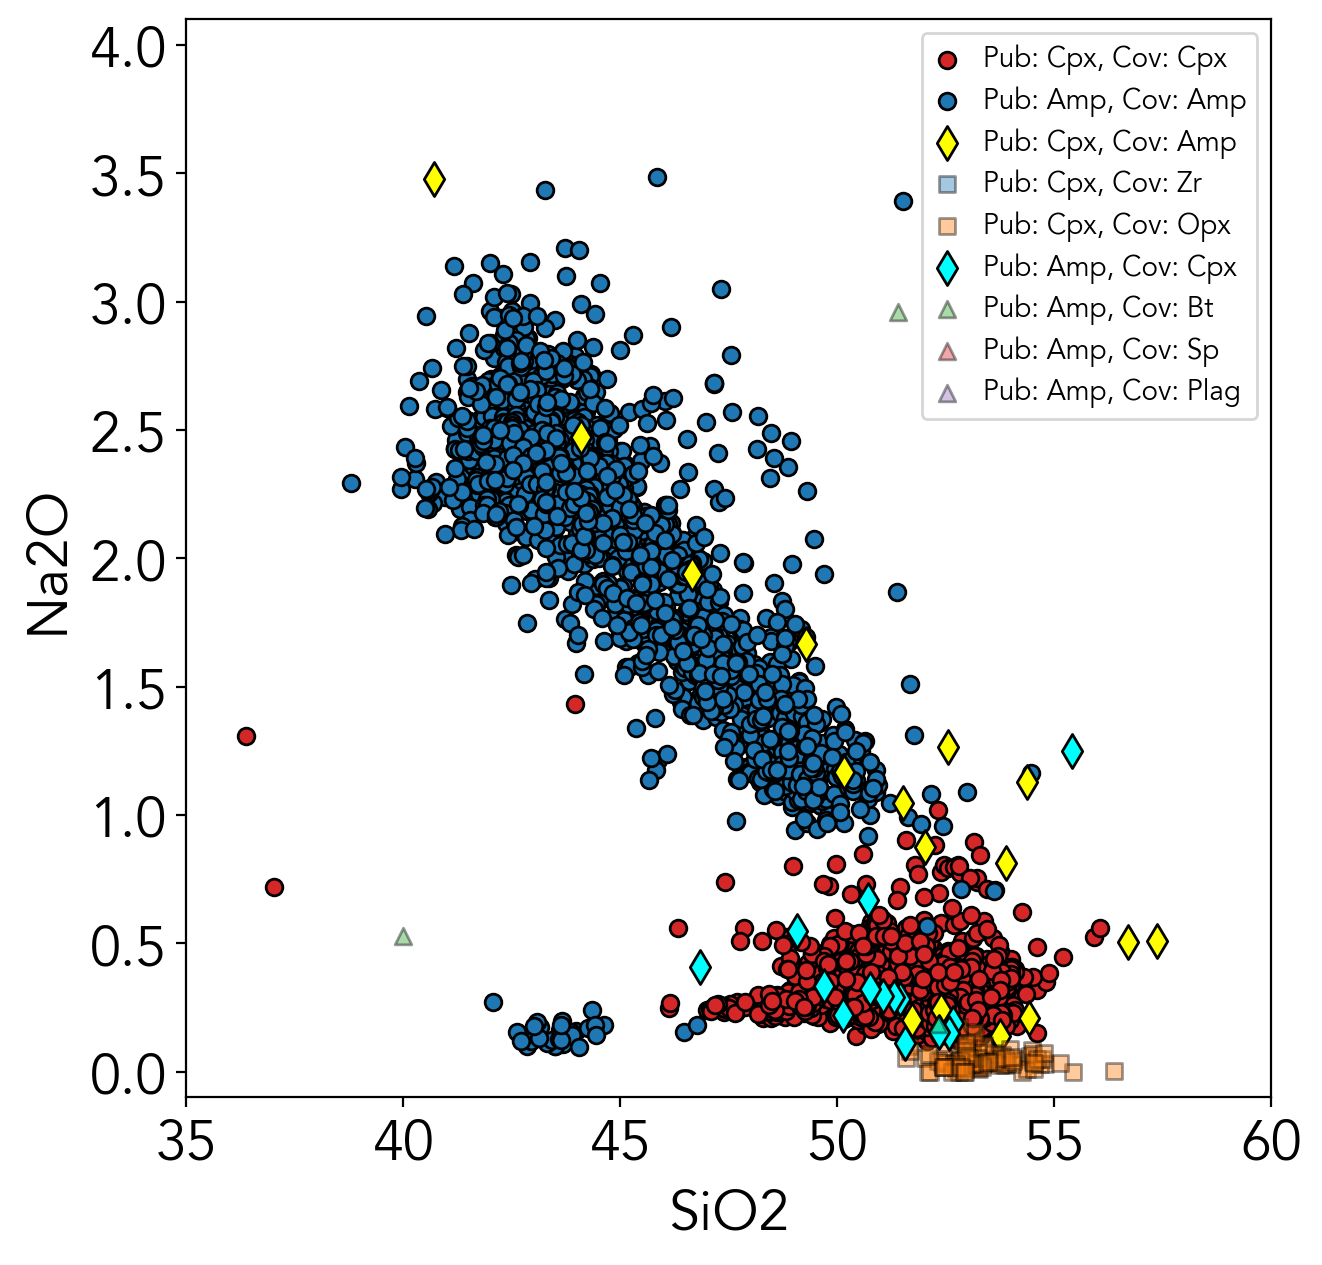

In [9]:
x='SiO2'
y='Na2O'

plt.figure(figsize=(7,7))
plt.scatter(corr_cpx[x], corr_cpx[y], color='tab:red', ec='k', label='Pub: Cpx, Cov: Cpx')
plt.scatter(corr_amp[x], corr_amp[y], color='tab:blue', ec='k', label='Pub: Amp, Cov: Amp')

plt.scatter(incorr_cpx_cov_amp[x], incorr_cpx_cov_amp[y], color='yellow', ec='k', marker='d', s=75, label='Pub: Cpx, Cov: Amp')
plt.scatter(incorr_cpx_cov_zr[x], incorr_cpx_cov_zr[y], ec='k', alpha=0.4, marker='s', label='Pub: Cpx, Cov: Zr')
plt.scatter(incorr_cpx_cov_opx[x], incorr_cpx_cov_opx[y],  ec='k', alpha=0.4, marker='s', label='Pub: Cpx, Cov: Opx')

plt.scatter(incorr_amp_cov_cpx[x], incorr_amp_cov_cpx[y], color='cyan', ec='k', marker='d', s=75, label='Pub: Amp, Cov: Cpx')
plt.scatter(incorr_amp_cov_bt[x], incorr_amp_cov_bt[y], ec='k', alpha=0.4, marker='^', label='Pub: Amp, Cov: Bt')
plt.scatter(incorr_amp_cov_sp[x], incorr_amp_cov_sp[y], ec='k', alpha=0.4, marker='^', label='Pub: Amp, Cov: Sp')
plt.scatter(incorr_amp_cov_plag[x], incorr_amp_cov_plag[y], ec='k', alpha=0.4, marker='^', label='Pub: Amp, Cov: Plag')

plt.xlim([35, 60])
plt.ylim([-0.1, 4.1])
plt.xlabel(x)
plt.ylabel(y)
plt.legend(prop={'size': 10}, labelspacing = 0.4, handletextpad = 0.8, handlelength = 1.0)
plt.show()

In [17]:
ust = corr_amp[corr_amp.Na2O<0.5]
ust

# plt.scatter(ust.SiO2, ust.Na2O)
# plt.xlim([35, 60])
# plt.ylim([-0.1,4.1])

,Volcano,Reference,Formation,Sample_ID_Cpx,Location,Mineral,SiO2,TiO2,Al2O3,Cr2O3,...,Sample_ID_Amp,Unnamed: 15,P2O5_Amp,Cl_Amp,F_Amp,oxides,OH_Amp,Sub Tot,NN_Labels,Best-Fit Mineral
1665,Jefferson,Ustunisik_et_al_2016,plag-hb enclave,0,Qawc3-1,Amphibole,43.8172,11.6280,11.2911,99.4966,...,0,0.0,0.0,0.0,0.0,0,0.2177,0.0,Garnet,Amphibole
1666,Jefferson,Ustunisik_et_al_2016,plag-hb enclave,0,Qawc3-1,Amphibole,44.6325,10.2927,10.9687,98.7091,...,0,0.0,0.0,0.0,0.0,0,0.2323,0.0,Garnet,Amphibole
1667,Jefferson,Ustunisik_et_al_2016,isolated crystal,0,Qawc3-2,Amphibole,43.6041,11.3663,11.1796,98.9525,...,0,0.0,0.0,0.0,0.0,0,0.2376,0.0,Garnet,Amphibole
1668,Jefferson,Ustunisik_et_al_2016,isolated crystal,0,Qawc3-2,Amphibole,43.6910,11.7456,11.2326,99.1213,...,0,0.0,0.0,0.0,0.0,0,0.2385,0.0,Garnet,Amphibole
1669,Jefferson,Ustunisik_et_al_2016,isolated crystal,0,Qawc3-6,Amphibole,42.8539,12.3791,11.2128,98.3261,...,0,0.0,0.0,0.0,0.0,0,0.1842,0.0,Garnet,Amphibole
1670,Jefferson,Ustunisik_et_al_2016,plag-hb enclave,0,Qawc3-7,Amphibole,43.9881,10.6255,11.2760,98.3007,...,0,0.0,0.0,0.0,0.0,0,0.2398,0.0,Garnet,Amphibole
1671,Jefferson,Ustunisik_et_al_2016,plag-hb enclave,0,Qawc3-7,Amphibole,43.7042,11.0417,11.1698,98.6235,...,0,0.0,0.0,0.0,0.0,0,0.2611,0.0,Garnet,Amphibole
1672,Jefferson,Ustunisik_et_al_2016,plag-hb enclave,0,Qawc3-7,Amphibole,43.1401,11.6328,11.3018,98.7745,...,0,0.0,0.0,0.0,0.0,0,0.2786,0.0,Garnet,Amphibole
1673,Jefferson,Ustunisik_et_al_2016,isolated crystal,0,Qawc-5-1,Amphibole,44.3565,10.8367,11.3834,99.9894,...,0,0.0,0.0,0.0,0.0,0,0.2530,0.0,Garnet,Amphibole
1674,Jefferson,Ustunisik_et_al_2016,isolated crystal,0,Qawc-5-1,Amphibole,42.0680,10.8564,8.2527,101.8937,...,0,0.0,0.0,0.0,0.0,0,0.1706,0.0,Spinel,Amphibole


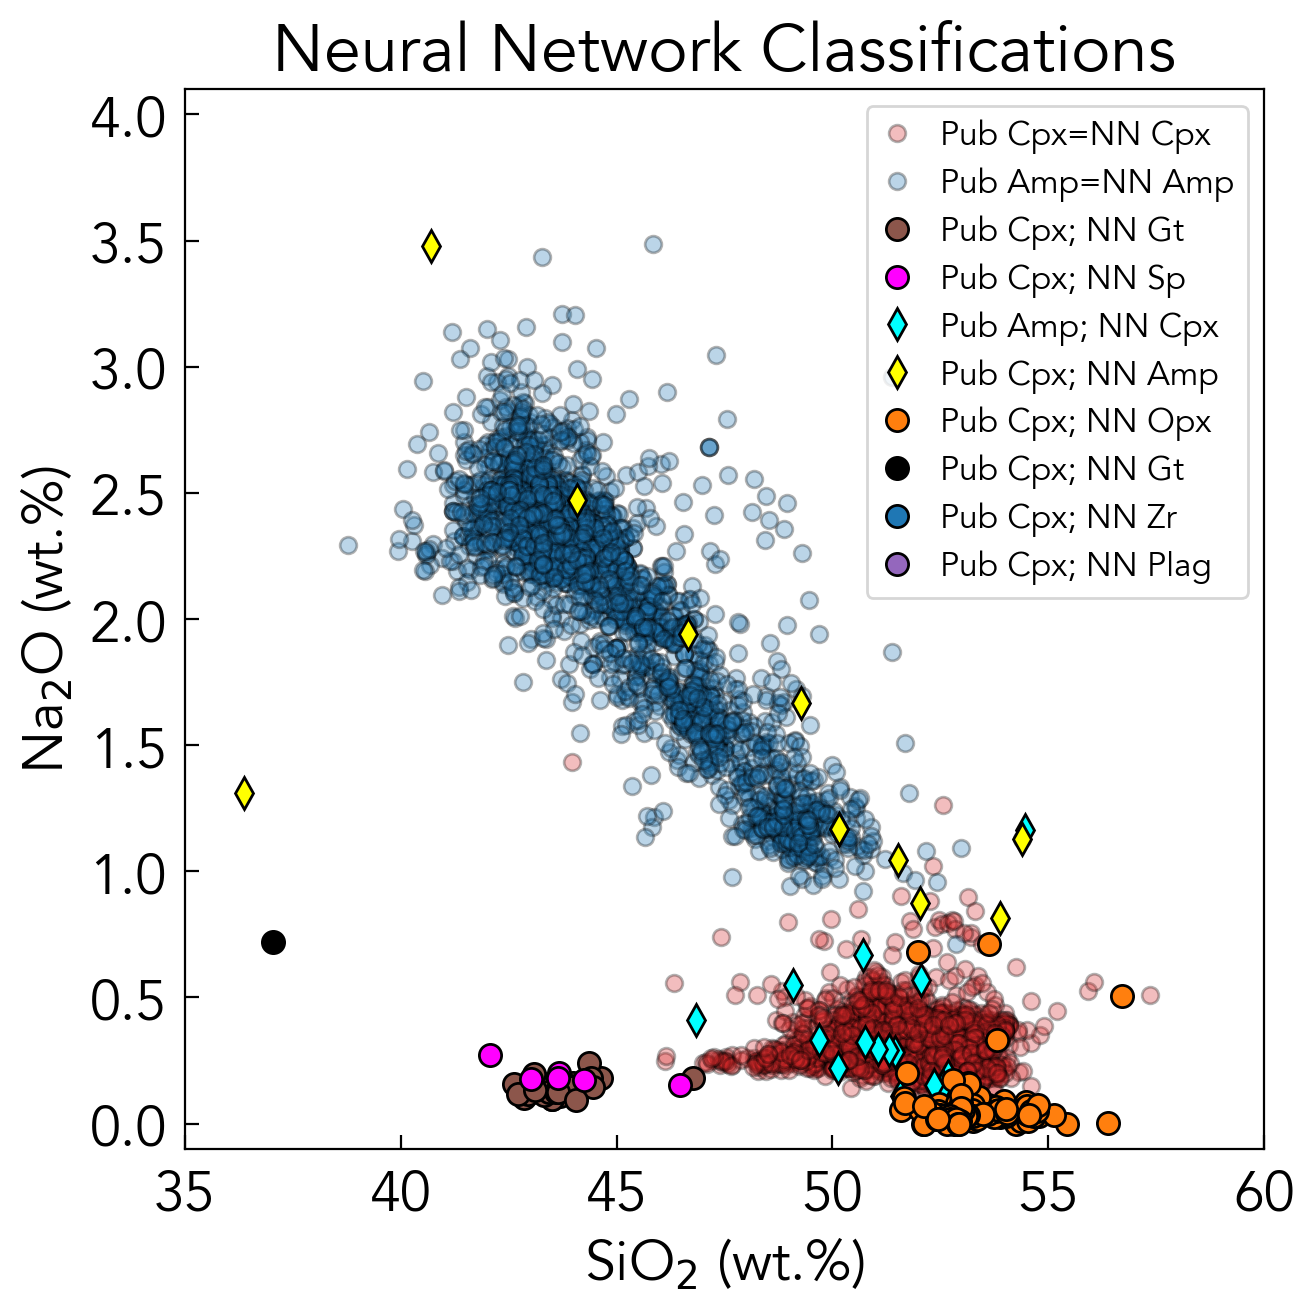

In [20]:
df_Cpx=cpxamp_df.loc[cpxamp_df['Mineral']=='Clinopyroxene']
S_Cpx=df_Cpx['NN_Labels']=='Clinopyroxene'
S_Amp=df_Cpx['NN_Labels']=='Amphibole'
S_Opx=df_Cpx['NN_Labels']=='Orthopyroxene'
S_Gt=df_Cpx['NN_Labels']=='Garnet'
S_Zr=df_Cpx['NN_Labels']=='Zircon'
S_Plg=df_Cpx['NN_Labels']=='Plagioclase'
df_Amp=cpxamp_df.loc[cpxamp_df['Mineral']=='Amphibole']
SA_Cpx=df_Amp['NN_Labels']=='Clinopyroxene'
SA_Amp=df_Amp['NN_Labels']=='Amphibole'
SA_Gt=df_Amp['NN_Labels']=='Garnet'
SA_Sp=df_Amp['NN_Labels']=='Spinel'

SA_Opx=df_Amp['NN_Labels']=='Orthopyroxene'

plt.figure(figsize=(7,7))
plt.title('Neural Network Classifications')
plt.plot(df_Cpx[x].loc[S_Cpx], df_Cpx[y].loc[S_Cpx], 'ok', mfc='tab:red', label='Pub Cpx=NN Cpx', alpha=0.3)
plt.plot(df_Amp[x].loc[SA_Amp], df_Amp[y].loc[SA_Amp], 'ok', mfc='tab:blue', label='Pub Amp=NN Amp', alpha=0.3)
plt.plot(df_Amp[x].loc[SA_Gt], df_Amp[y].loc[SA_Gt], 'o', mfc='tab:brown', mec='black', lw=1, label='Pub Cpx; NN Gt', ms=8)
plt.plot(df_Amp[x].loc[SA_Sp], df_Amp[y].loc[SA_Sp], 'o', mfc='magenta', mec='black', lw=1, label='Pub Cpx; NN Sp', ms=8)

plt.plot(df_Amp[x].loc[SA_Cpx], df_Amp[y].loc[SA_Cpx], 'dk', mfc='cyan', lw=1, mec='black', label='Pub Amp; NN Cpx', ms=8)
plt.plot(df_Cpx[x].loc[S_Amp], df_Cpx[y].loc[S_Amp], 'dk',  mfc='yellow', lw=1, mec='black', label='Pub Cpx; NN Amp', ms=8)
plt.plot(df_Cpx[x].loc[S_Opx], df_Cpx[y].loc[S_Opx], 'ok',  mfc='tab:orange', lw=1, mec='black', label='Pub Cpx; NN Opx', ms=8)
plt.plot(df_Cpx[x].loc[S_Gt], df_Cpx[y].loc[S_Gt], 'o', mfc='black', mec='black', lw=1, label='Pub Cpx; NN Gt', ms=8)
plt.plot(df_Cpx[x].loc[S_Zr], df_Cpx[y].loc[S_Zr], 'o', mfc='tab:blue', mec='black', lw=1, label='Pub Cpx; NN Zr', ms=8)
plt.plot(df_Cpx[x].loc[S_Plg], df_Cpx[y].loc[S_Plg], 'o', mfc='tab:purple', mec='black', lw=1, label='Pub Cpx; NN Plag', ms=8)

plt.xlim([35, 60])
plt.ylim([-0.1, 4.1])
plt.legend(prop={'size': 12}, labelspacing = 0.4, handletextpad = 0.8, handlelength = 1.0)
plt.xlabel('SiO$_\mathrm{2}$ (wt.%)')
plt.ylabel('Na$_\mathrm{2}$O (wt.%)')
plt.tick_params(axis="x", direction='in', length=5, pad = 6.5) 
plt.tick_params(axis="y", direction='in', length=5, pad = 6.5)
plt.tight_layout()